In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [2]:
jeju = df[df['정점명'].isin(['제주1', '제주2', '제주3'])].drop(['정점명'], axis=1)

In [3]:
jeju

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
20,2021-11-18,13.0,9.0,1,18.52,33.66,8.08,8.62,0.42,6.76,...,0.48,0,0,1,0,0,1,2021,11,18
21,2021-11-18,22.0,13.0,1,17.91,33.19,8.12,8.89,0.77,20.27,...,0.80,0,0,1,0,0,1,2021,11,18
22,2021-11-18,29.0,9.0,1,18.30,33.59,8.09,8.75,0.48,10.32,...,0.55,0,0,1,0,0,1,2021,11,18
30,2021-11-18,13.0,9.0,1,18.54,33.66,8.09,8.09,1.27,16.90,...,0.64,0,0,1,0,1,0,2021,11,18
31,2021-11-18,22.0,13.0,1,18.22,33.41,8.10,8.75,1.42,22.20,...,0.53,0,0,1,0,1,0,2021,11,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,2011-02-23,25.0,7.8,1,13.78,34.47,8.09,9.50,0.29,50.30,...,1.62,0,0,1,0,1,0,2011,2,23
1616,2011-02-22,14.0,7.9,2,13.42,34.46,8.10,9.75,0.25,50.90,...,2.57,0,1,0,0,0,1,2011,2,22
1617,2011-02-22,20.0,6.7,2,13.38,34.50,8.11,9.78,0.41,62.10,...,0.61,0,1,0,0,0,1,2011,2,22
1627,2011-02-22,14.0,7.9,2,13.44,34.47,8.11,9.49,0.19,55.60,...,0.20,0,1,0,0,1,0,2011,2,22


In [4]:
jeju.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

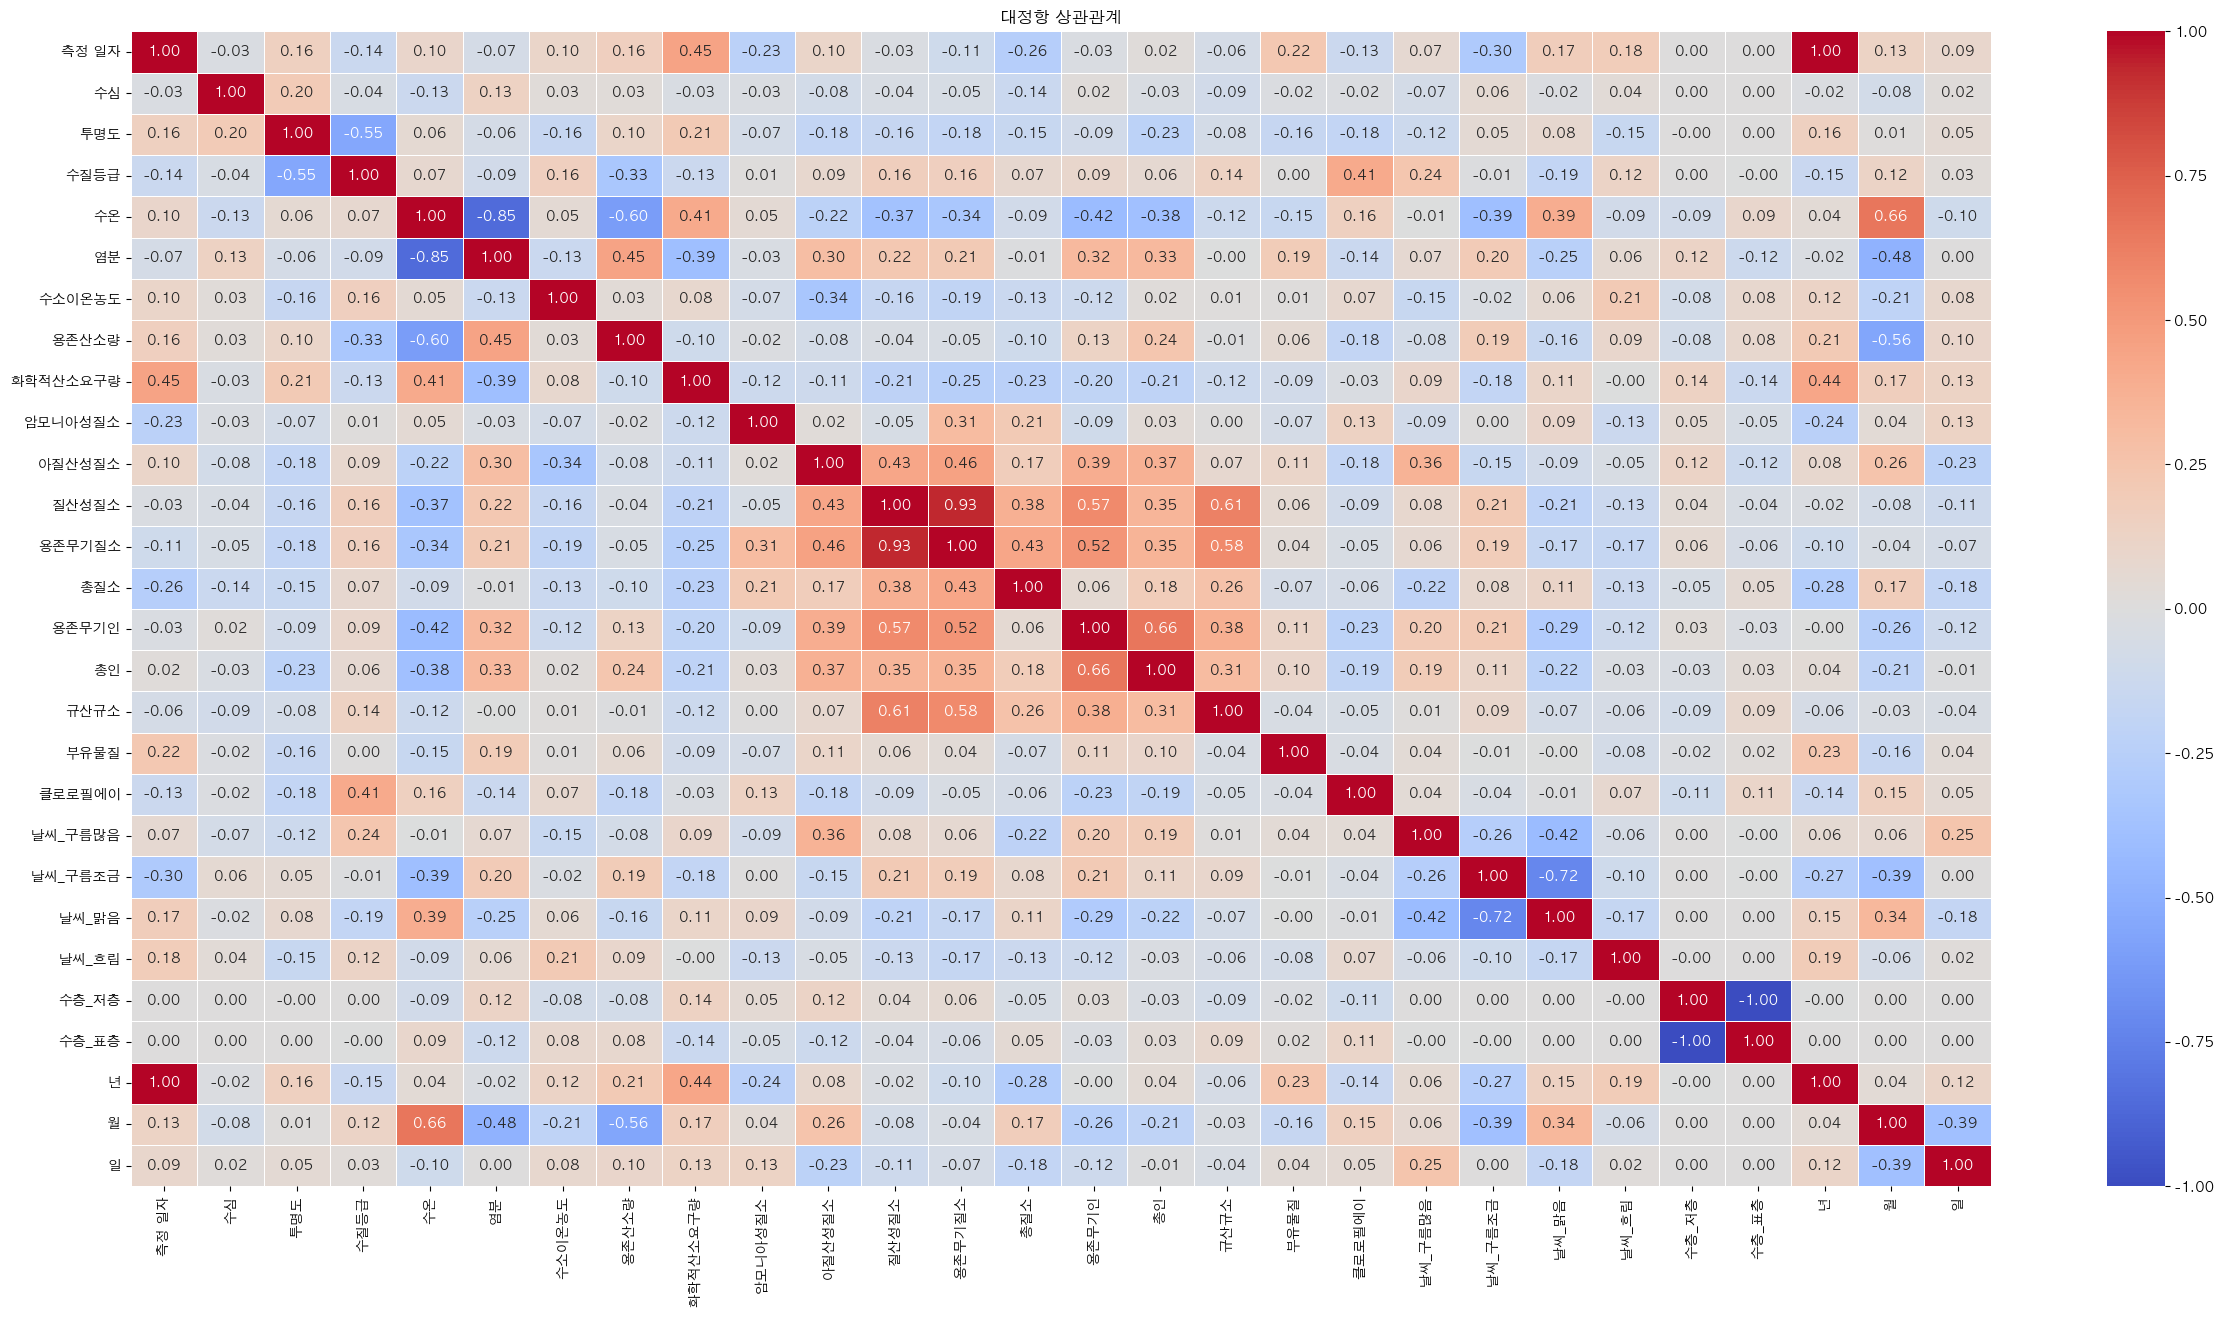

In [5]:
jejucorr = jeju.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(jejucorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('대정항 상관관계')
plt.show()

In [6]:
temp = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [7]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
20,18.52,0,0,1,0,11
21,17.91,0,0,1,0,11
22,18.30,0,0,1,0,11
30,18.54,0,0,1,0,11
31,18.22,0,0,1,0,11
...,...,...,...,...,...,...
1608,13.78,0,0,1,0,2
1616,13.42,0,1,0,0,2
1617,13.38,0,1,0,0,2
1627,13.44,0,1,0,0,2


In [8]:
tempcorrs=temp.corr()


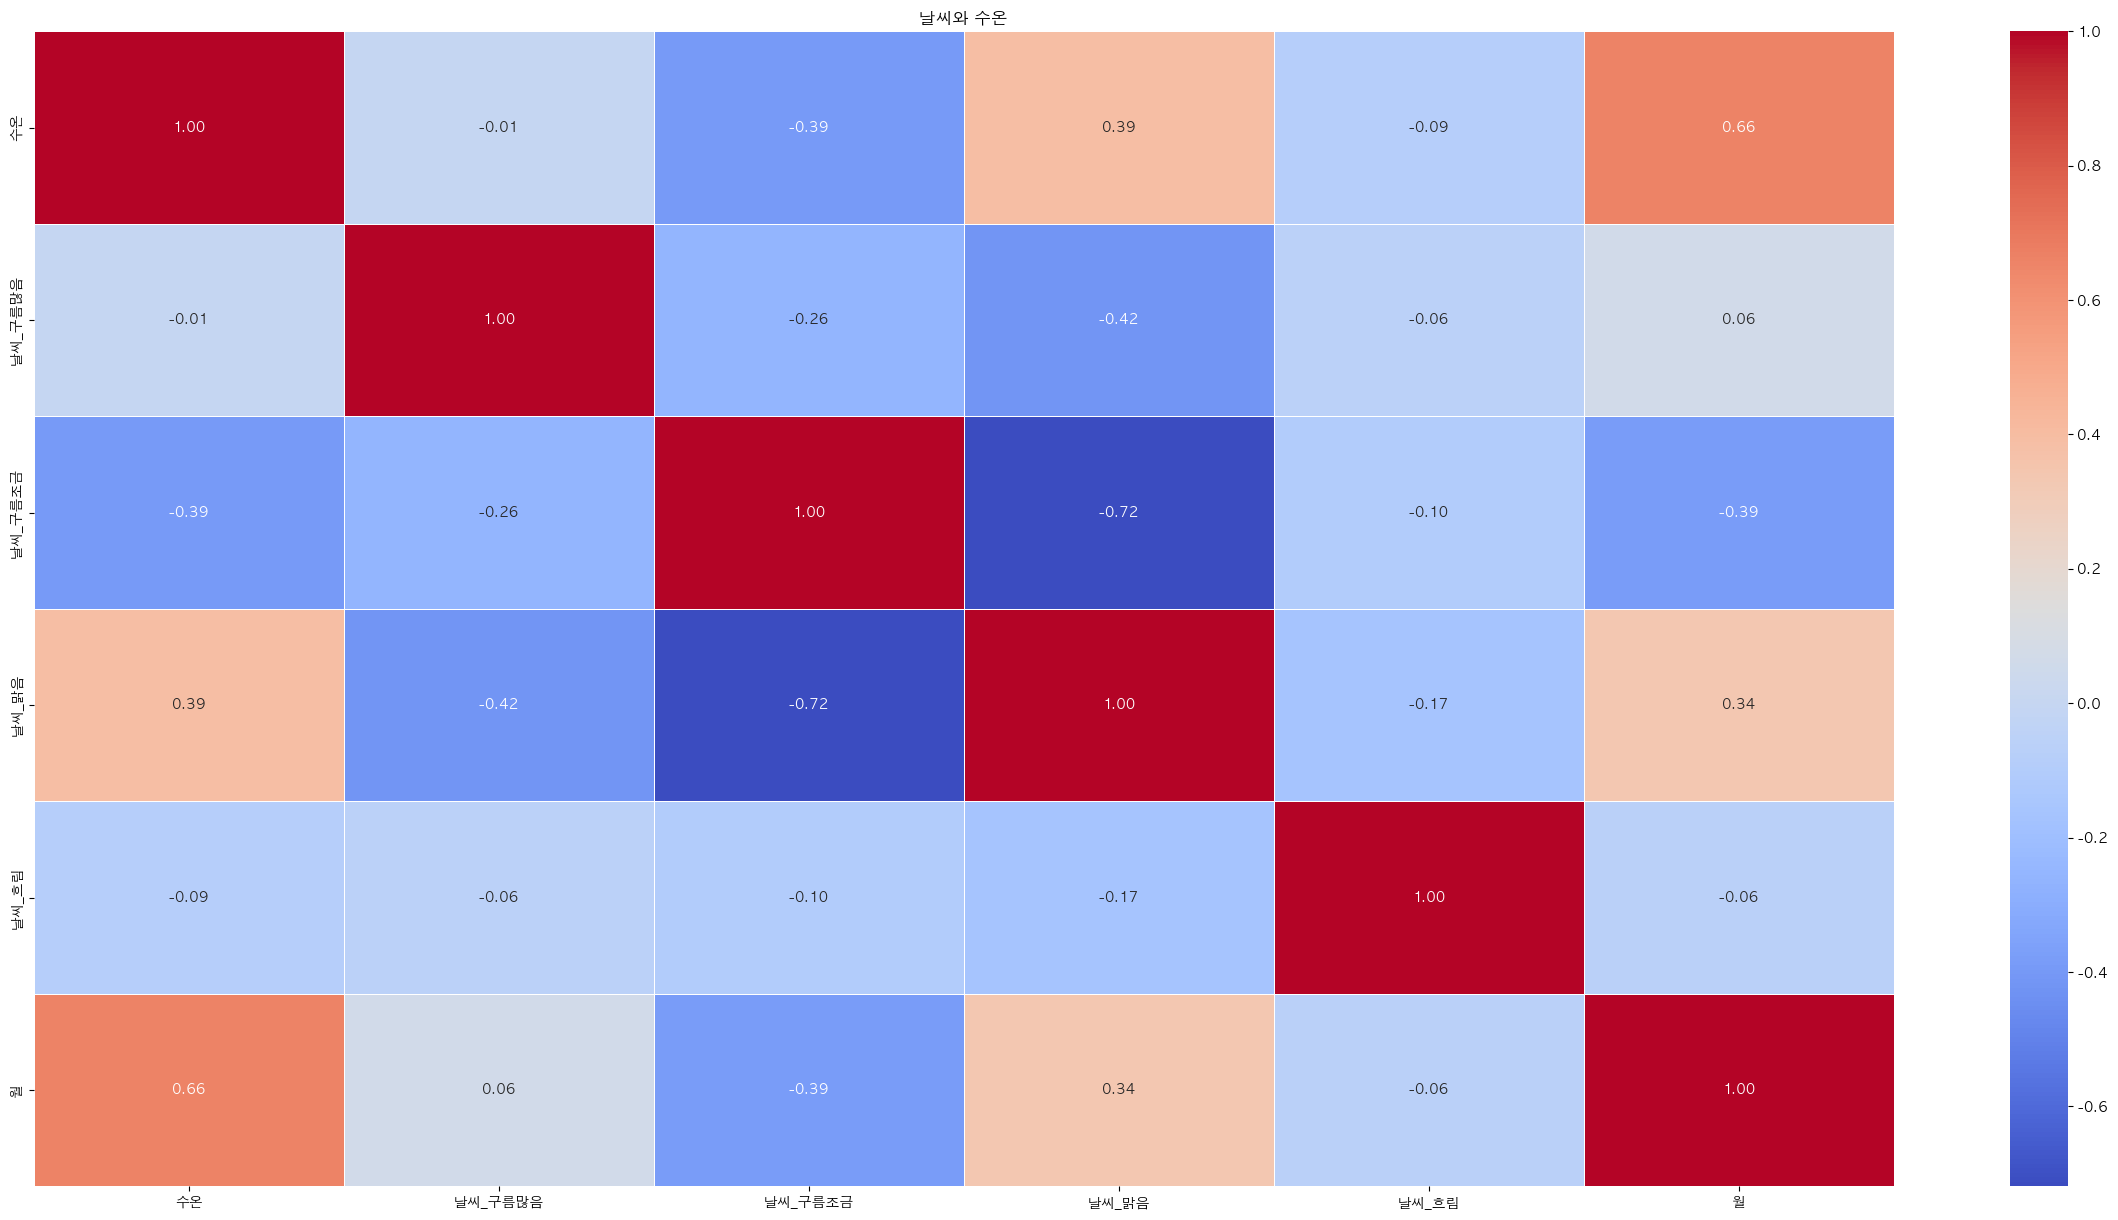

In [9]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [10]:
che = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [11]:
checorrs = che.corr()

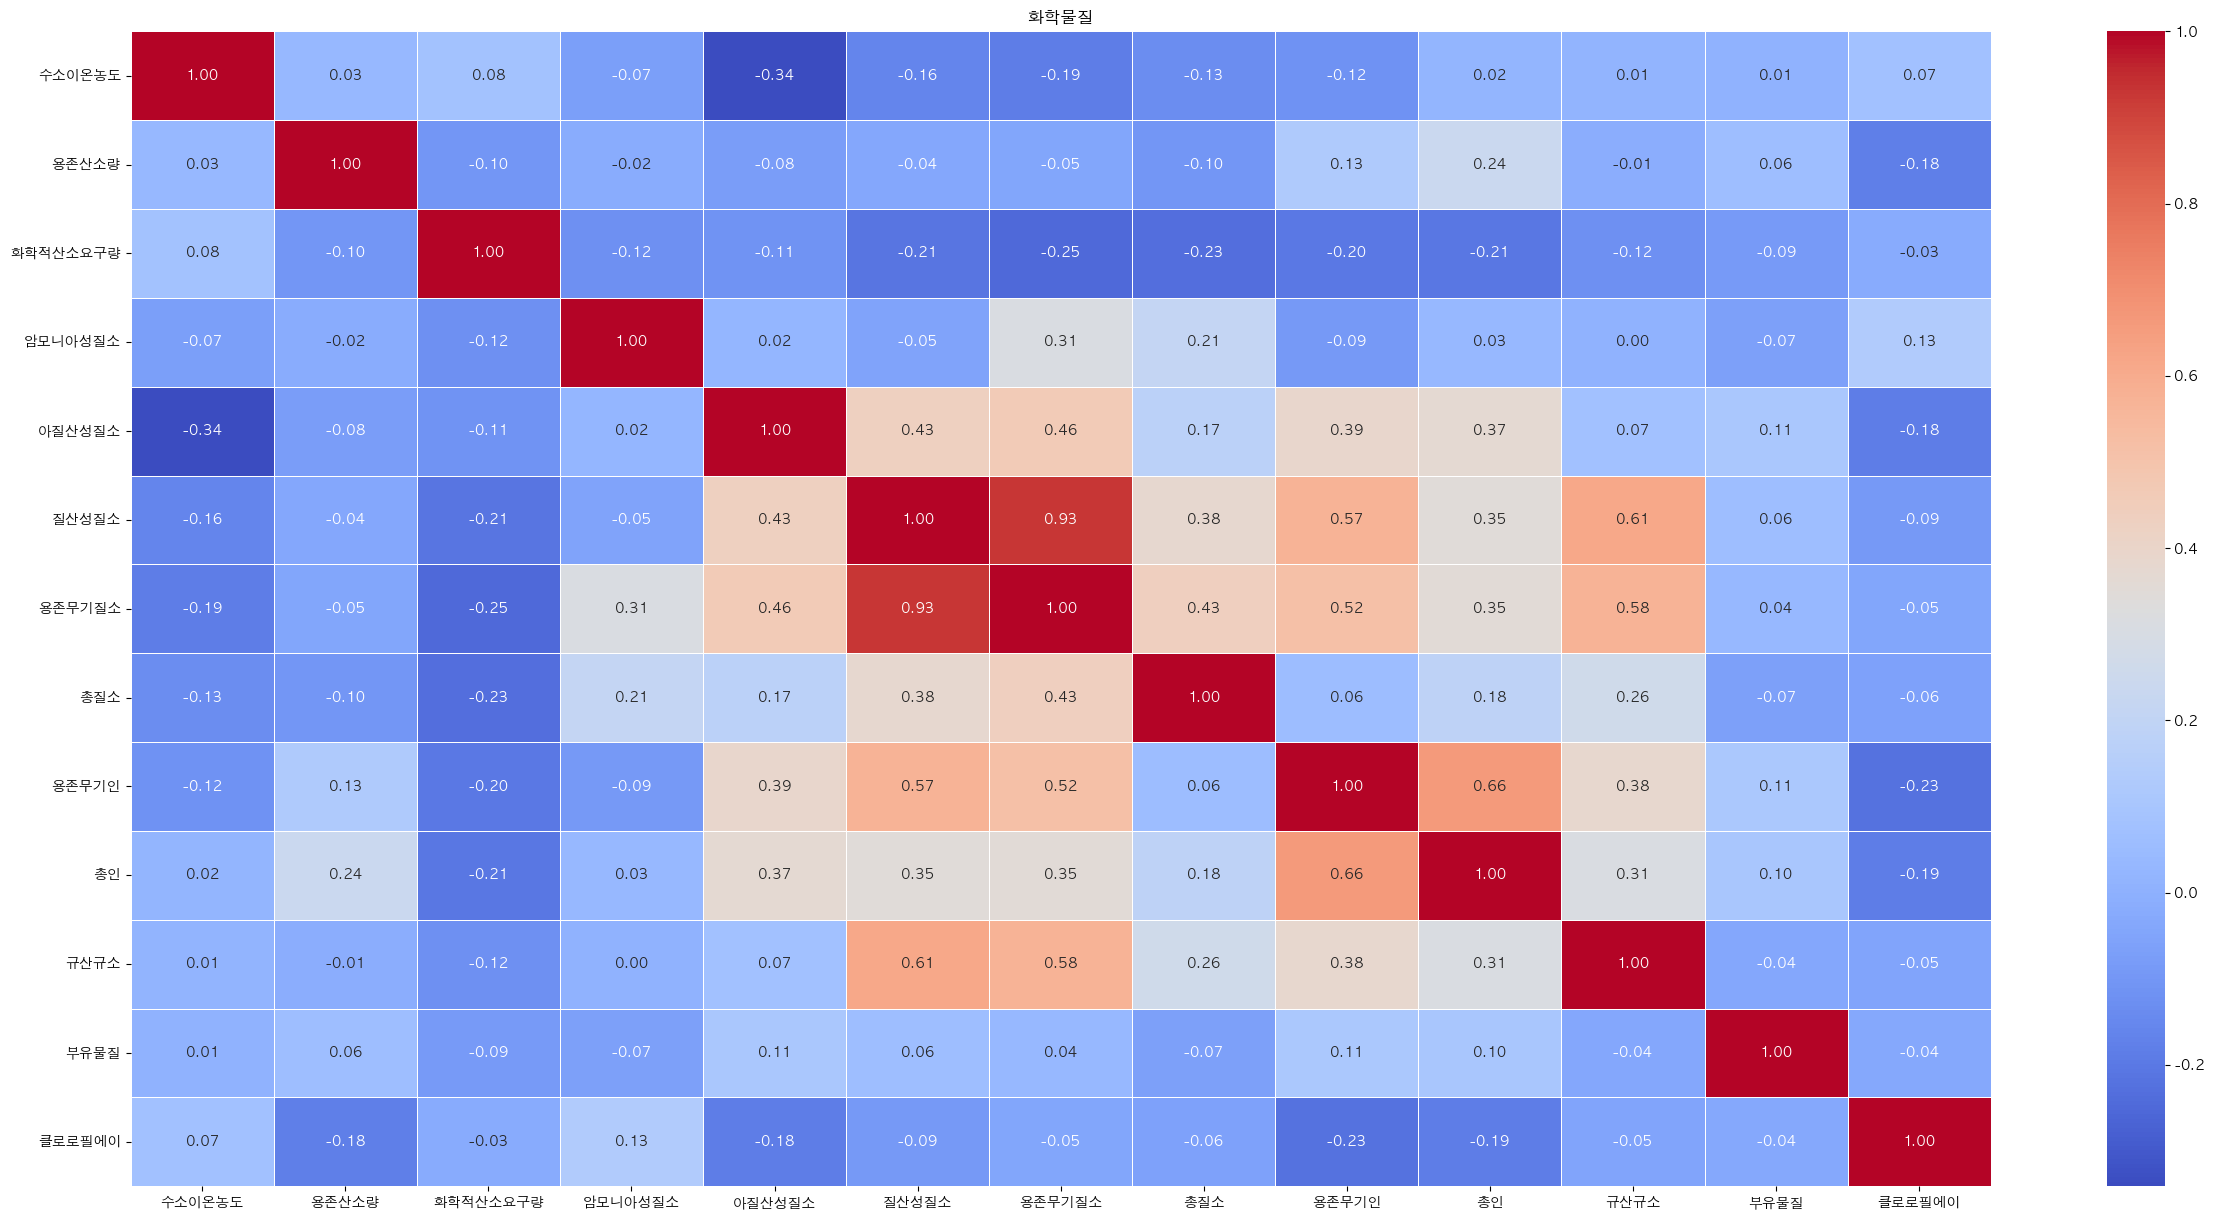

In [12]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [13]:
che2 = jeju.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [14]:
che2corrs = che2.corr()

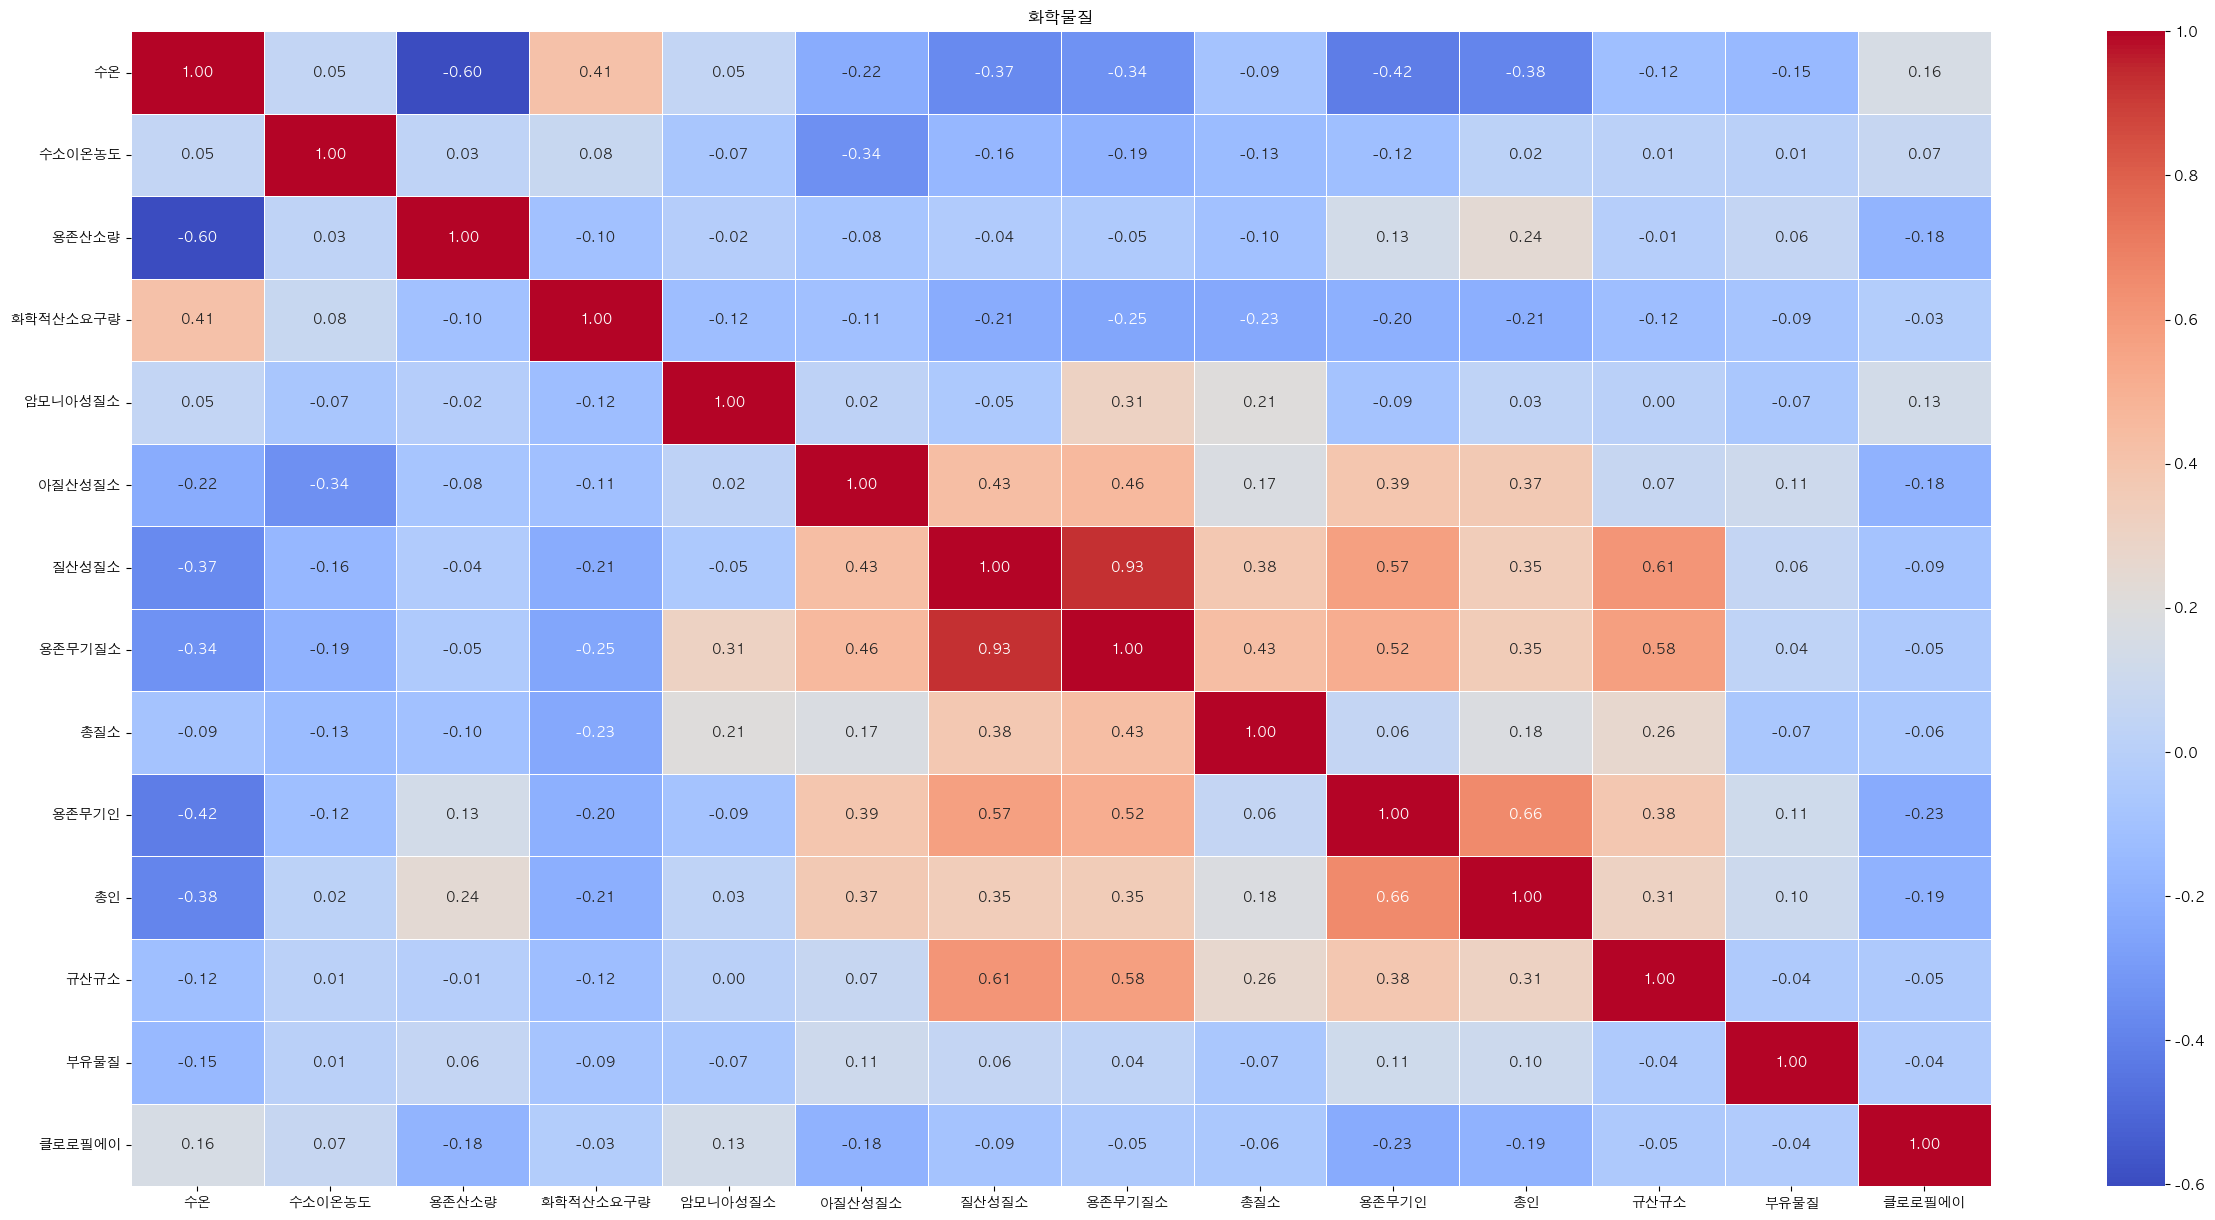

In [15]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/3213474090.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396

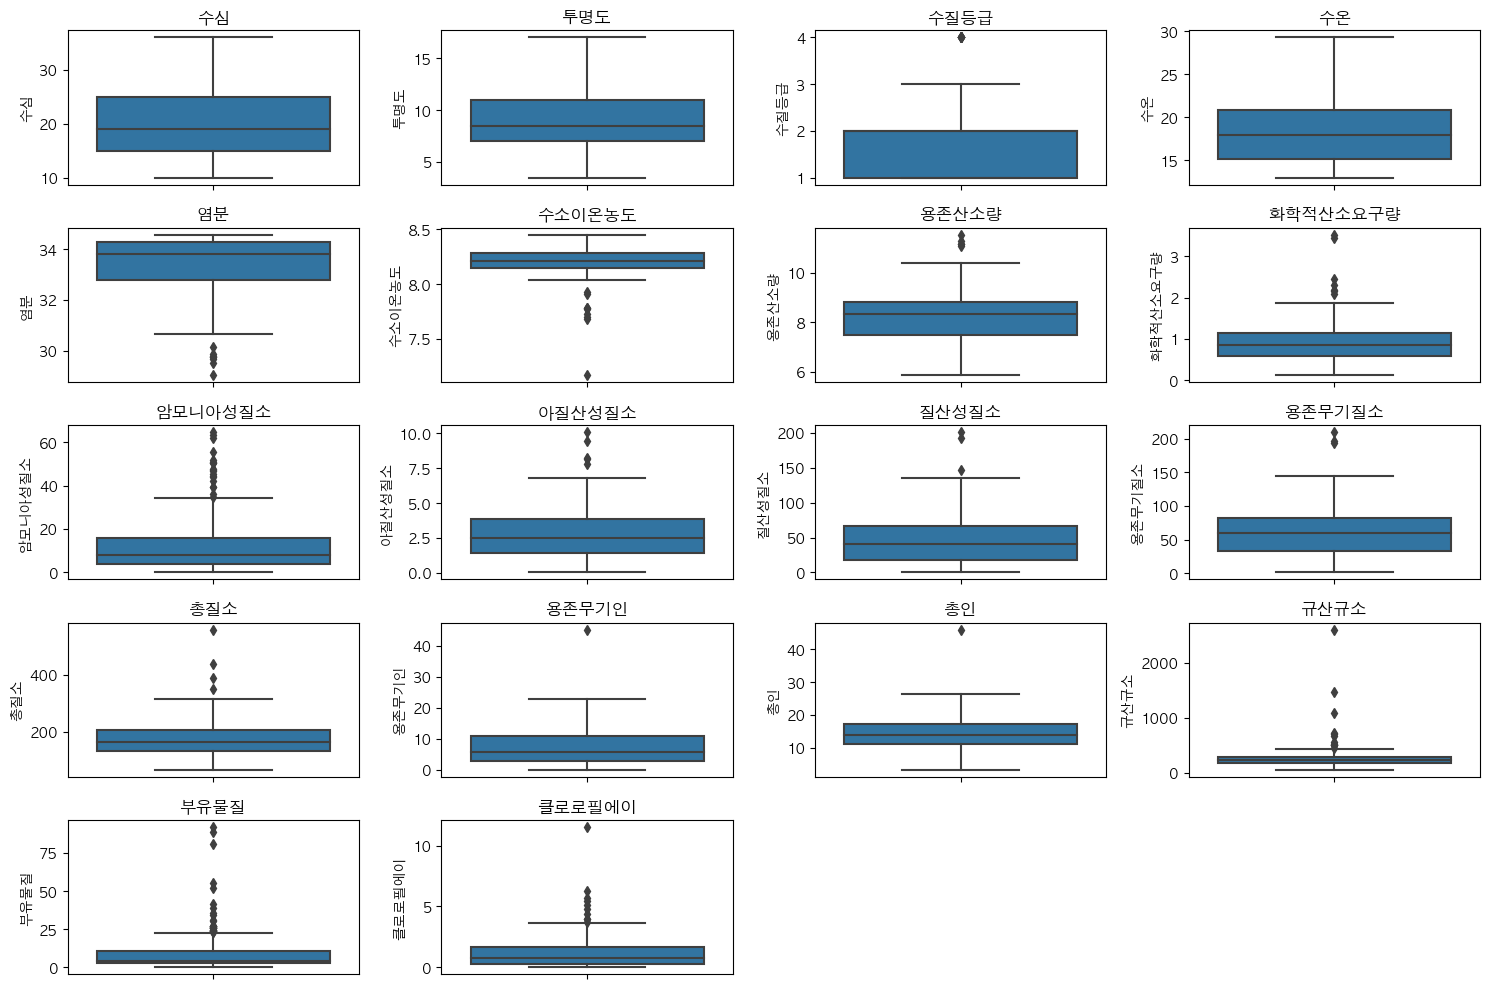

In [16]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=jeju[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2240096578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/22400

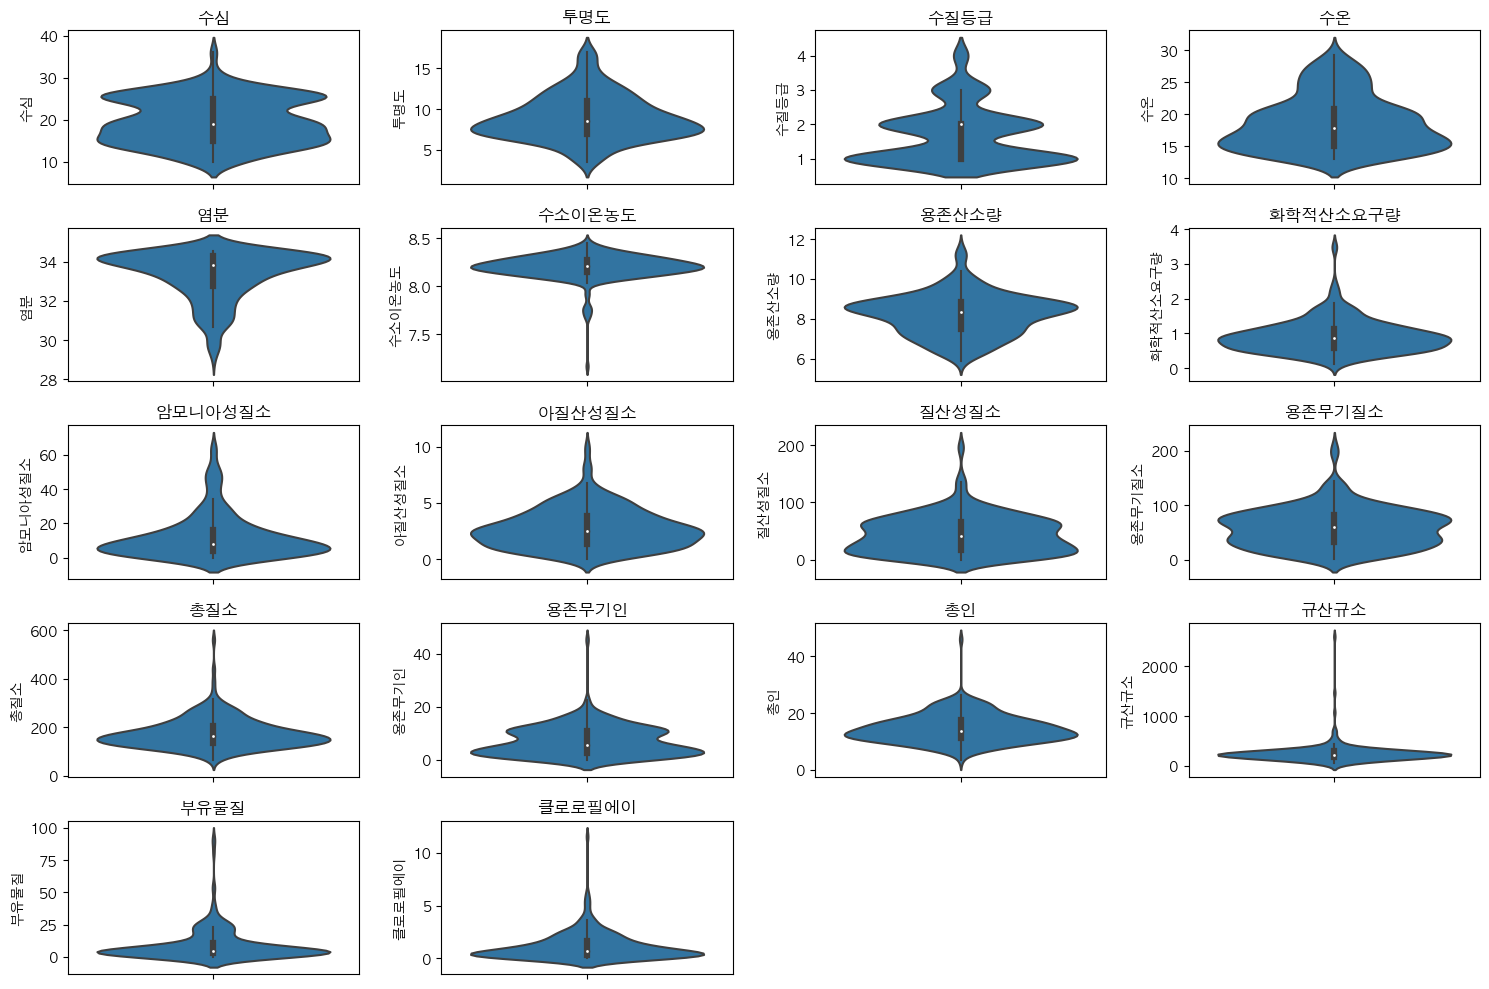

In [17]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=jeju[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/2336464693.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_80396/23364

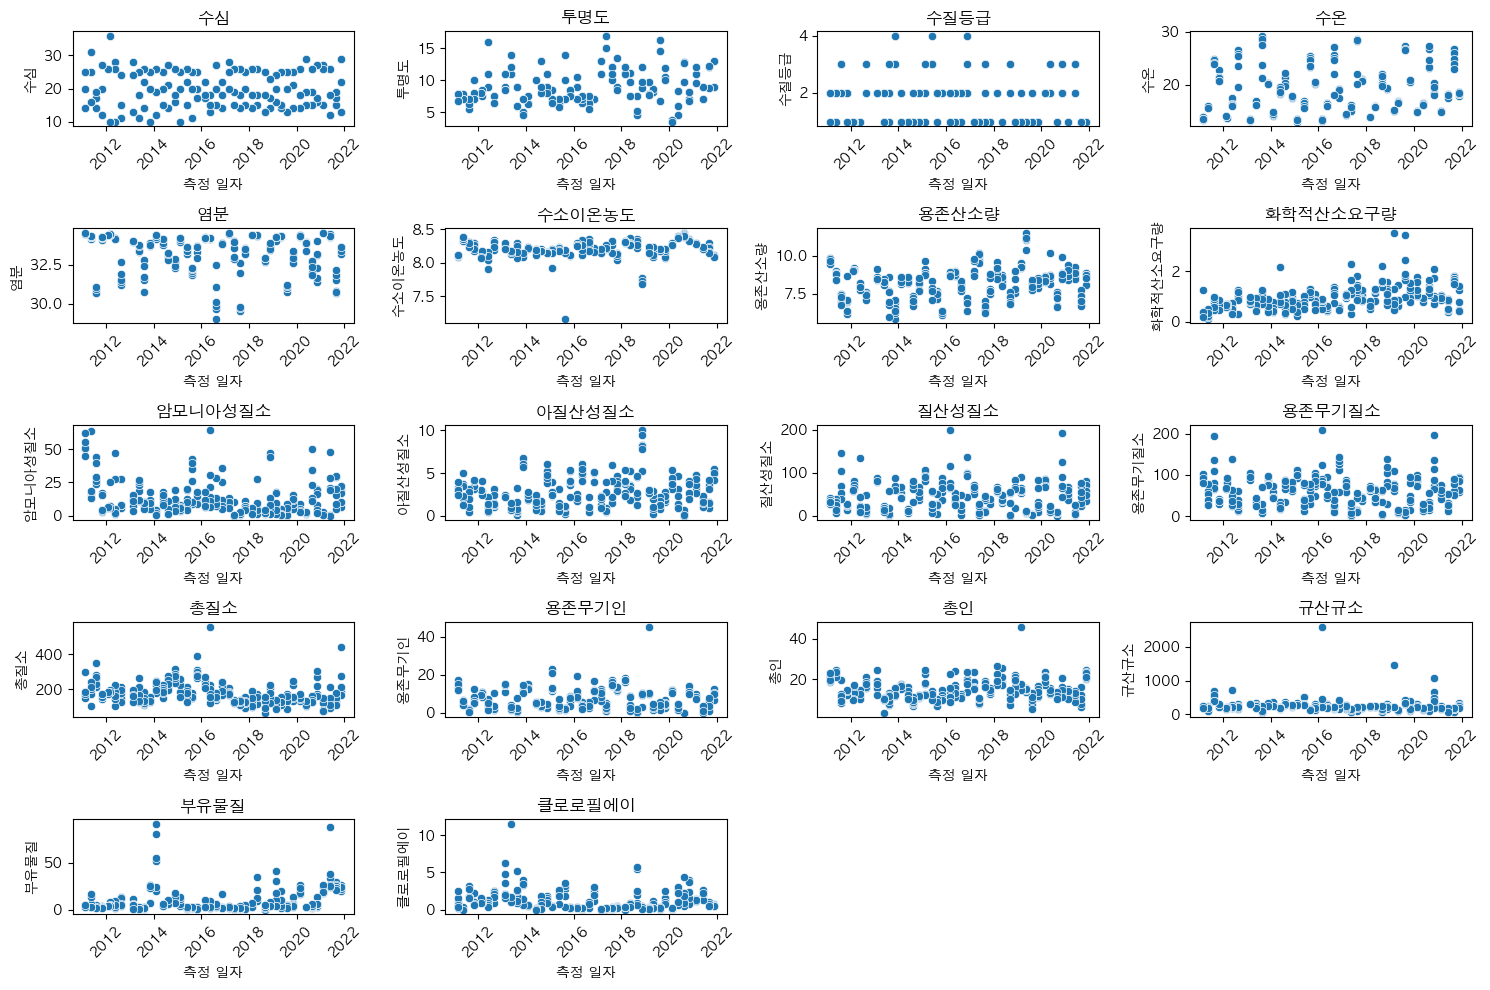

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=jeju, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

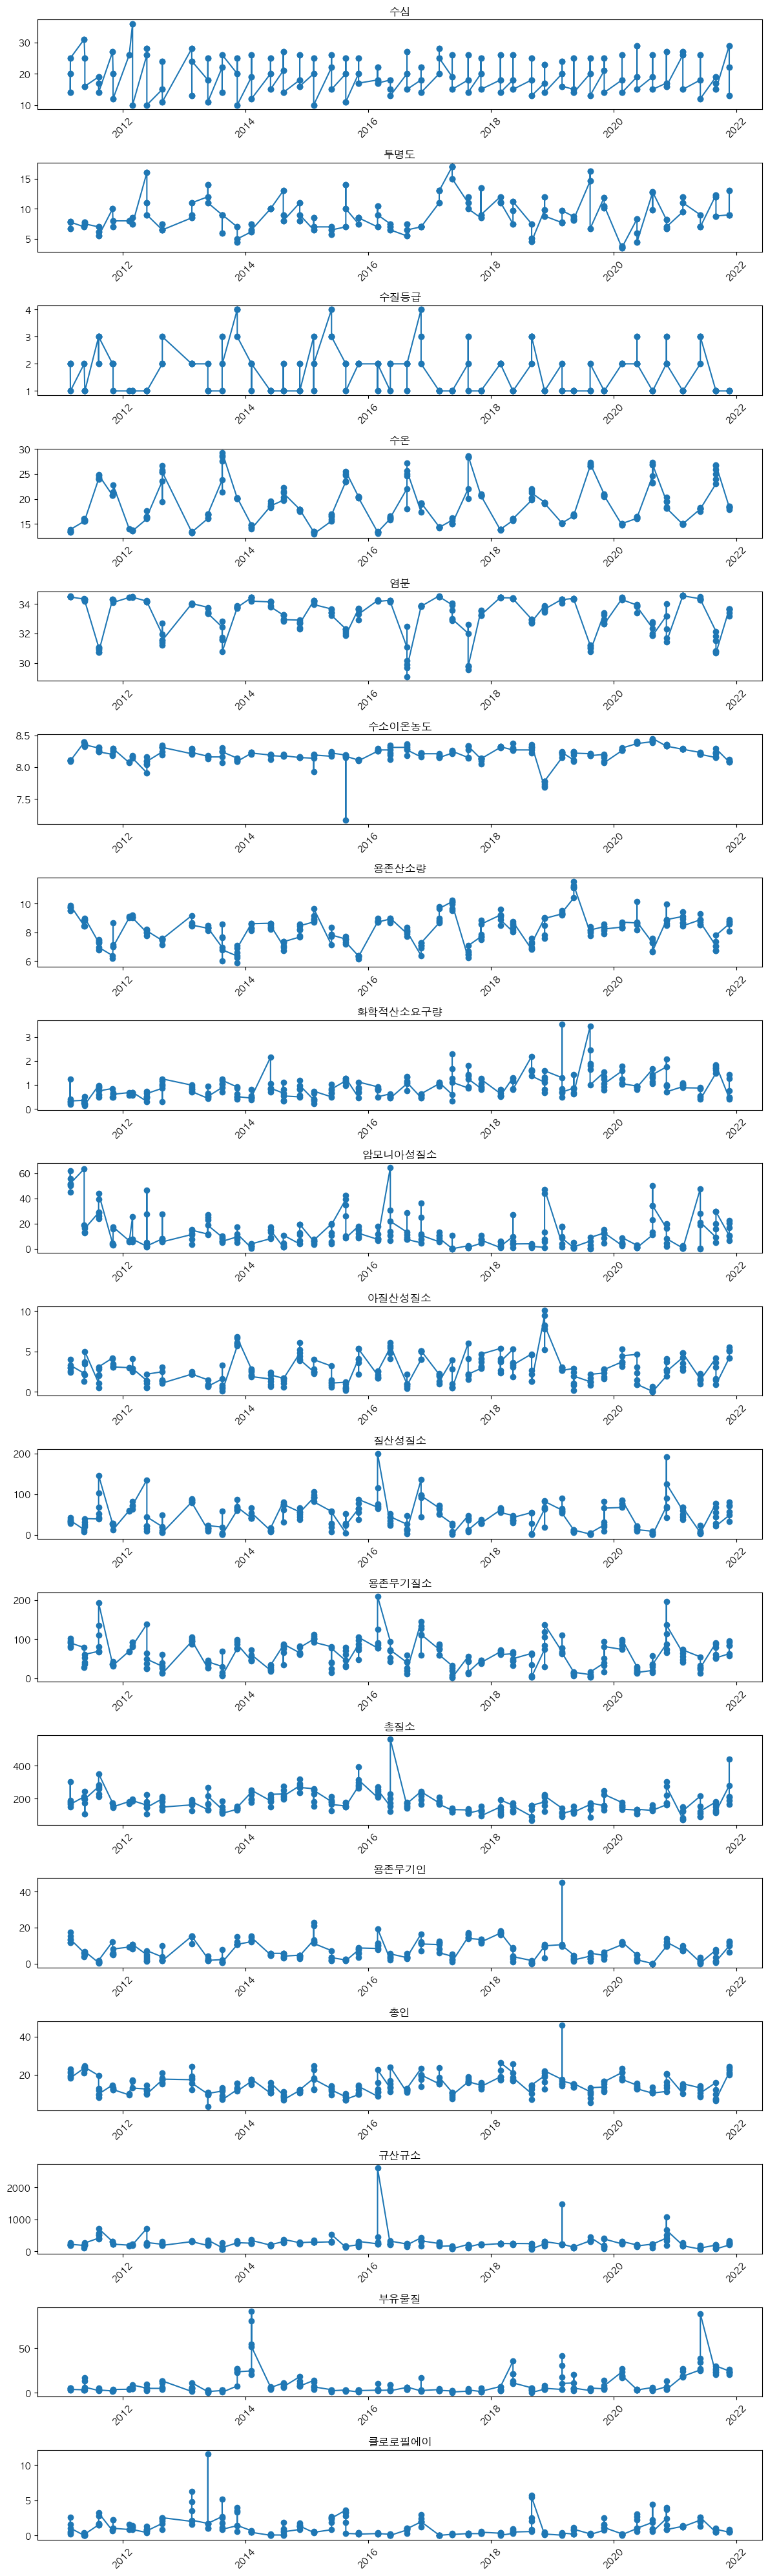

In [19]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(jeju['측정 일자'], jeju[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


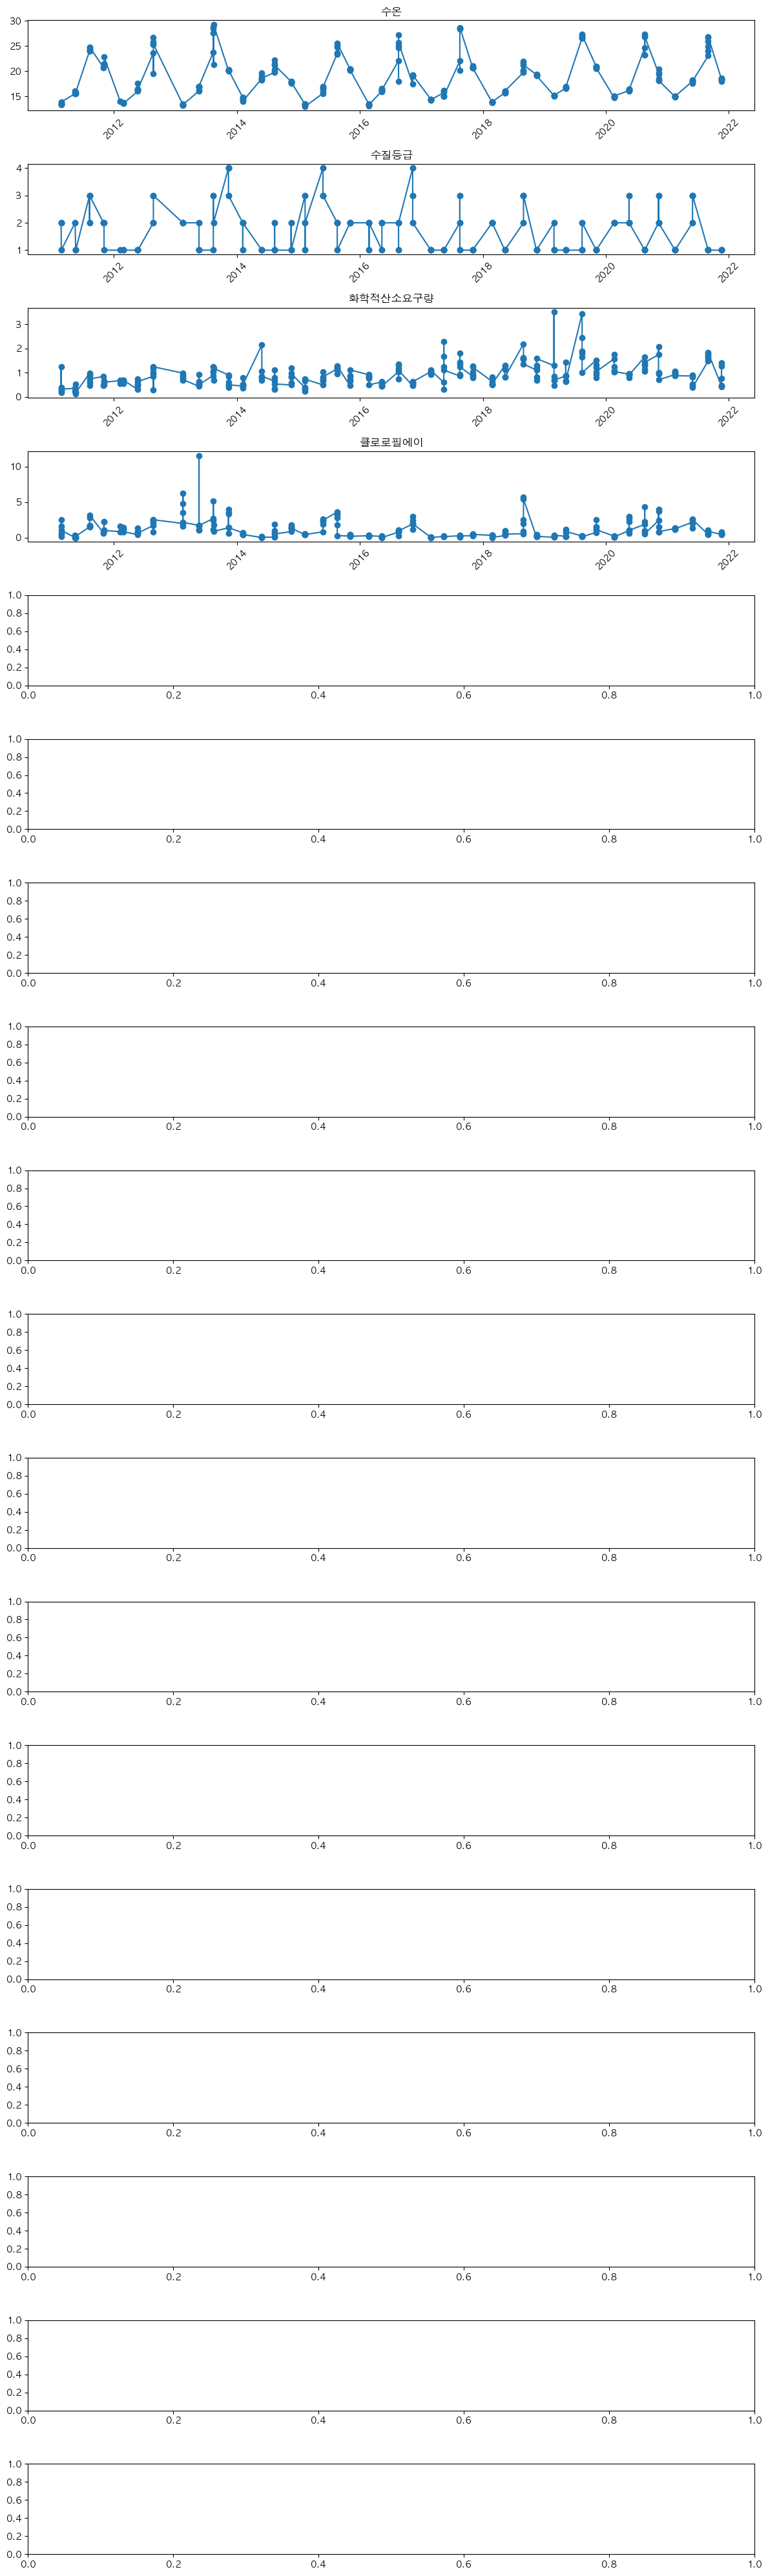

In [20]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(new_col):
    axes[i].plot(jeju['측정 일자'], jeju[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
